27.	The Iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to predict the iris plant category? (Use Linear Kernel)

iii.	Create a confusion matrix and evaluate the model using Precision.


Dataset Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--- SVM with Linear Kernel ---
Precision: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Predictions on Test Set:
   SepalLengthCm  SepalWidthCm  PetalLen

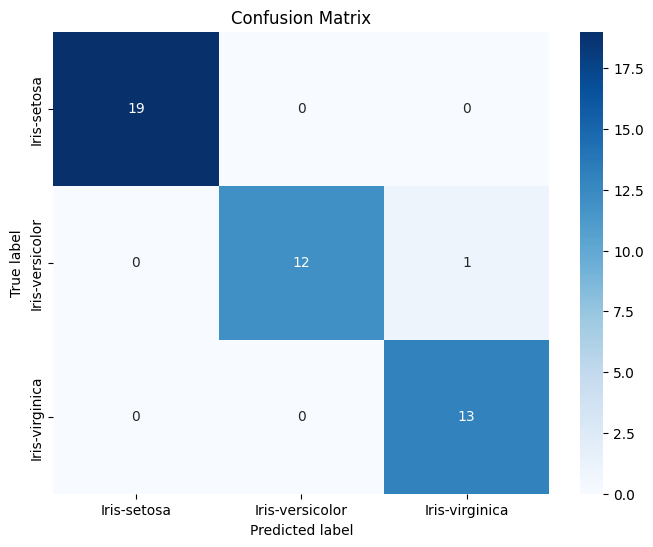

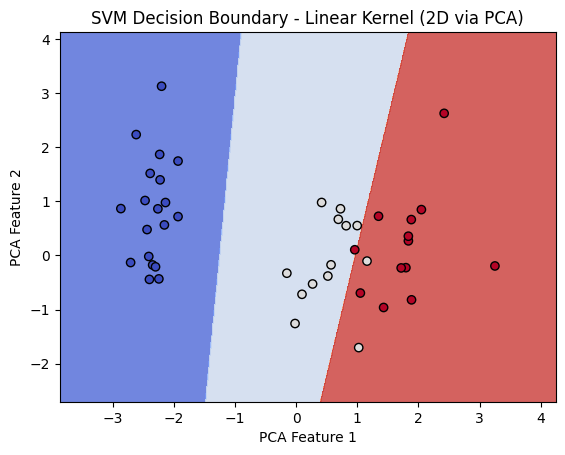

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import precision_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset (from uploaded file)
file_path = 'Iris.csv'  # Path to the uploaded Iris dataset
df = pd.read_csv(file_path)

# Step 1: Understand and clean the dataset (no cleanup required here)
print("Dataset Overview:")
print(df.head())  # Display first few rows

# Step 2: Convert the categorical 'Species' column to numerical labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Encode species

# Step 3: Split data into features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and target (Species)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train SVM with a linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Precision
    precision = precision_score(y_true, y_pred, average='macro')  # Use macro for multi-class precision

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Precision: {precision:.2f}")
    print("\nClassification Report:\n", class_report)

    return precision

# Step 7: Evaluate the SVM using Precision
precision_linear = classification_metrics(y_test, y_pred, "SVM with Linear Kernel")

# Step 8: Output predictions for each test instance
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'SepalLengthCm': X_test[:, 0],  # Standardized SepalLengthCm
    'SepalWidthCm': X_test[:, 1],  # Standardized SepalWidthCm
    'PetalLengthCm': X_test[:, 2],  # Standardized PetalLengthCm
    'PetalWidthCm': X_test[:, 3],  # Standardized PetalWidthCm
    'Actual Species': le.inverse_transform(y_test),  # Inverse transform to original species name
    'Predicted Species': le.inverse_transform(y_pred)  # Predicted species name
})

print(test_results.head())  # Display first few rows of the prediction results

# Step 9: Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, le.classes_)  # Use species names as labels

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_linear_2d = SVC(kernel='linear', random_state=42)
svm_linear_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_linear_2d, X_test_2d, y_test, "Linear Kernel (2D via PCA)")

28.	The Iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to predict the iris plant category? (Use Linear Kernel)

iii.	Create a confusion matrix and evaluate the model using Recall.


Dataset Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--- SVM with Linear Kernel ---
Recall: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Predictions on Test Set:
   SepalLengthCm  SepalWidthCm  PetalLength

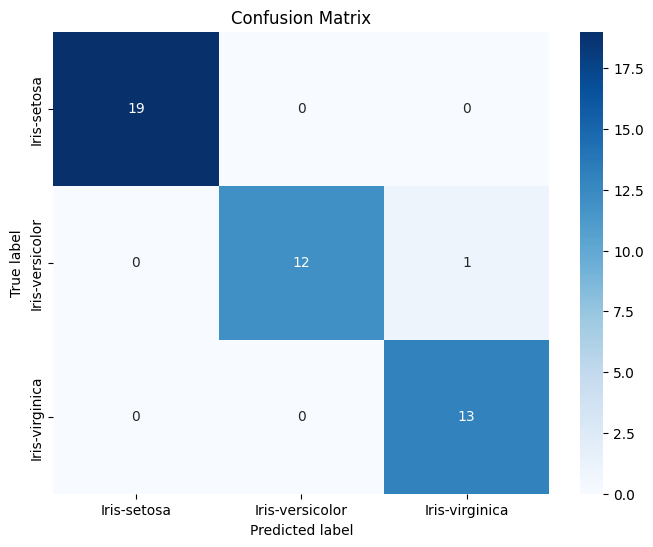

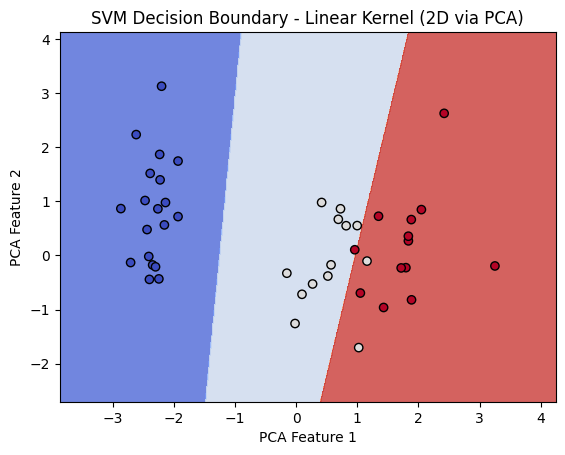

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset (from uploaded file)
file_path = 'Iris.csv'  # Path to the uploaded Iris dataset
df = pd.read_csv(file_path)

# Step 1: Understand and clean the dataset (no cleanup required here)
print("Dataset Overview:")
print(df.head())  # Display first few rows

# Step 2: Convert the categorical 'Species' column to numerical labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Encode species

# Step 3: Split data into features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and target (Species)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train SVM with a linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Recall
    recall = recall_score(y_true, y_pred, average='macro')  # Use macro for multi-class recall

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Recall: {recall:.2f}")
    print("\nClassification Report:\n", class_report)

    return recall

# Step 7: Evaluate the SVM using Recall
recall_linear = classification_metrics(y_test, y_pred, "SVM with Linear Kernel")

# Step 8: Output predictions for each test instance
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'SepalLengthCm': X_test[:, 0],  # Standardized SepalLengthCm
    'SepalWidthCm': X_test[:, 1],  # Standardized SepalWidthCm
    'PetalLengthCm': X_test[:, 2],  # Standardized PetalLengthCm
    'PetalWidthCm': X_test[:, 3],  # Standardized PetalWidthCm
    'Actual Species': le.inverse_transform(y_test),  # Inverse transform to original species name
    'Predicted Species': le.inverse_transform(y_pred)  # Predicted species name
})

print(test_results.head())  # Display first few rows of the prediction results

# Step 9: Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, le.classes_)  # Use species names as labels

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_linear_2d = SVC(kernel='linear', random_state=42)
svm_linear_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_linear_2d, X_test_2d, y_test, "Linear Kernel (2D via PCA)")

29.	The Iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to predict the iris plant category? (Use Linear Kernel)

iii.	Create a confusion matrix and evaluate the model using Accuracy.


Dataset Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--- SVM with Linear Kernel ---
Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Predictions on Test Set:
   SepalLengthCm  SepalWidthCm  PetalLeng

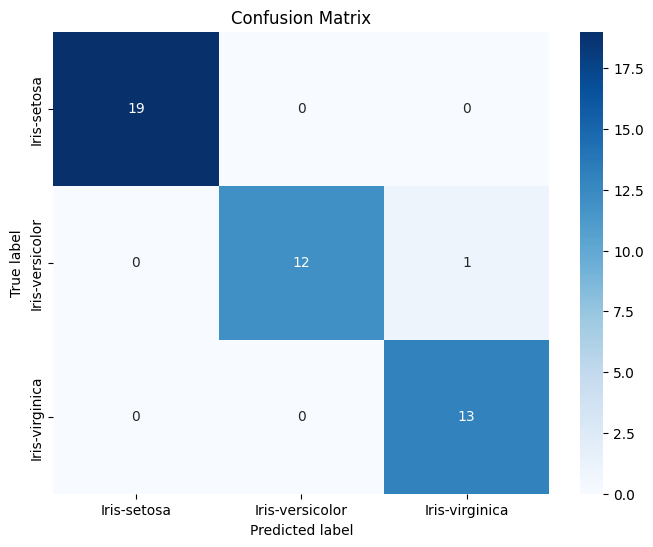

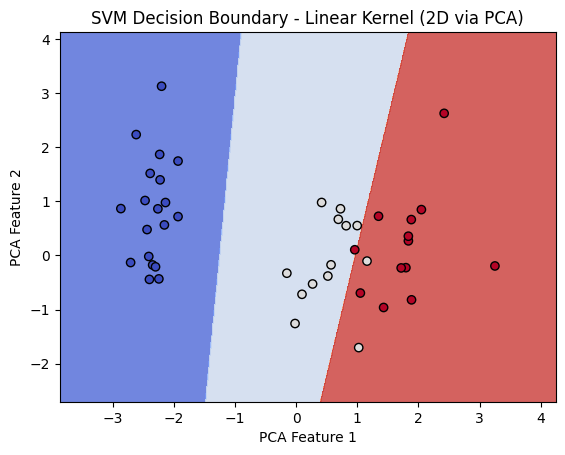

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset (from uploaded file)
file_path = 'Iris.csv'  # Path to the uploaded Iris dataset
df = pd.read_csv(file_path)

# Step 1: Understand and clean the dataset (no cleanup required here)
print("Dataset Overview:")
print(df.head())  # Display first few rows

# Step 2: Convert the categorical 'Species' column to numerical labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Encode species

# Step 3: Split data into features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and target (Species)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train SVM with a linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)  # Calculate accuracy

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", class_report)

    return accuracy

# Step 7: Evaluate the SVM using Accuracy
accuracy_linear = classification_metrics(y_test, y_pred, "SVM with Linear Kernel")

# Step 8: Output predictions for each test instance
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'SepalLengthCm': X_test[:, 0],  # Standardized SepalLengthCm
    'SepalWidthCm': X_test[:, 1],  # Standardized SepalWidthCm
    'PetalLengthCm': X_test[:, 2],  # Standardized PetalLengthCm
    'PetalWidthCm': X_test[:, 3],  # Standardized PetalWidthCm
    'Actual Species': le.inverse_transform(y_test),  # Inverse transform to original species name
    'Predicted Species': le.inverse_transform(y_pred)  # Predicted species name
})

print(test_results.head())  # Display first few rows of the prediction results

# Step 9: Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, le.classes_)  # Use species names as labels

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_linear_2d = SVC(kernel='linear', random_state=42)
svm_linear_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_linear_2d, X_test_2d, y_test, "Linear Kernel (2D via PCA)")

30.	The Iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to predict the iris plant category? (Use Linear Kernel)

iii.	Create a confusion matrix and evaluate the model using F1-Measure.


Dataset Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--- SVM with Linear Kernel ---
F1-Measure: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Predictions on Test Set:
   SepalLengthCm  SepalWidthCm  PetalLe

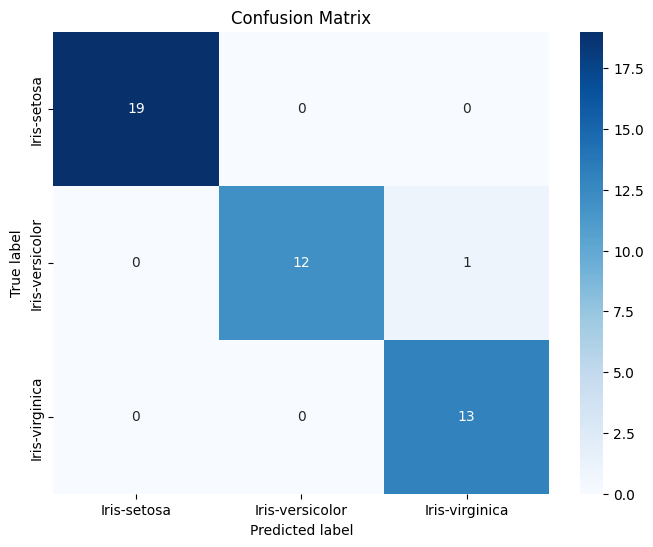

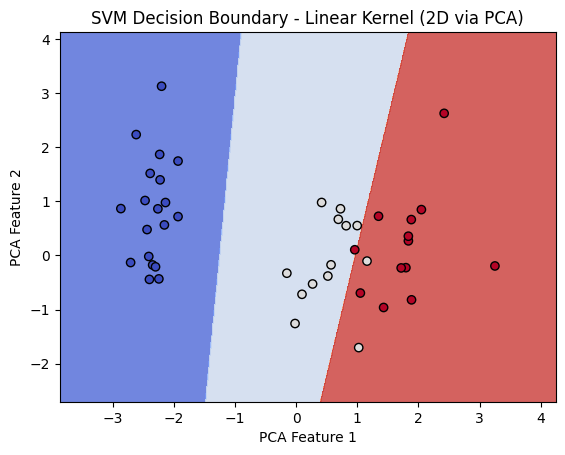

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset (from uploaded file)
file_path = 'Iris.csv'  # Path to the uploaded Iris dataset
df = pd.read_csv(file_path)

# Step 1: Understand and clean the dataset (no cleanup required here)
print("Dataset Overview:")
print(df.head())  # Display first few rows

# Step 2: Convert the categorical 'Species' column to numerical labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Encode species

# Step 3: Split data into features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and target (Species)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train SVM with a linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # F1-Measure
    f1 = f1_score(y_true, y_pred, average='macro')  # Use macro for multi-class F1-Measure

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"F1-Measure: {f1:.2f}")
    print("\nClassification Report:\n", class_report)

    return f1

# Step 7: Evaluate the SVM using F1-Measure
f1_linear = classification_metrics(y_test, y_pred, "SVM with Linear Kernel")

# Step 8: Output predictions for each test instance
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'SepalLengthCm': X_test[:, 0],  # Standardized SepalLengthCm
    'SepalWidthCm': X_test[:, 1],  # Standardized SepalWidthCm
    'PetalLengthCm': X_test[:, 2],  # Standardized PetalLengthCm
    'PetalWidthCm': X_test[:, 3],  # Standardized PetalWidthCm
    'Actual Species': le.inverse_transform(y_test),  # Inverse transform to original species name
    'Predicted Species': le.inverse_transform(y_pred)  # Predicted species name
})

print(test_results.head())  # Display first few rows of the prediction results

# Step 9: Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, le.classes_)  # Use species names as labels

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_linear_2d = SVC(kernel='linear', random_state=42)
svm_linear_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_linear_2d, X_test_2d, y_test, "Linear Kernel (2D via PCA)")

31.	The Iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to predict the iris plant category? (Use RBF Kernel)

iii.	Create a confusion matrix and evaluate the model using Precision.


Dataset Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--- SVM with RBF Kernel ---
Precision: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Predictions on Test Set:
   SepalLengthCm  SepalWidthCm  PetalLength

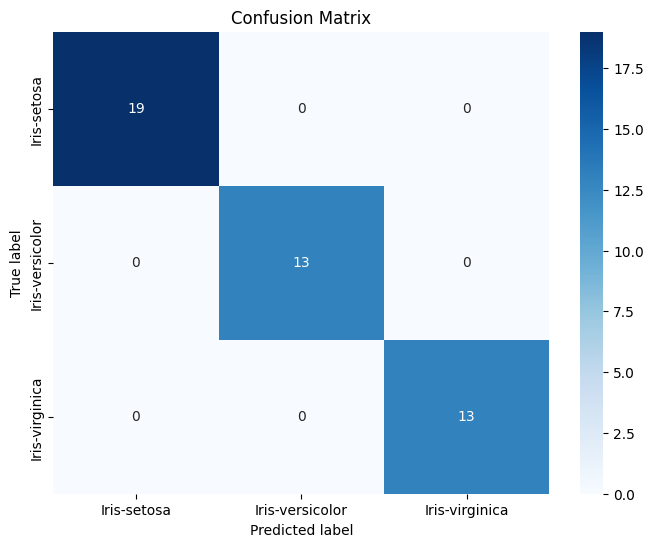

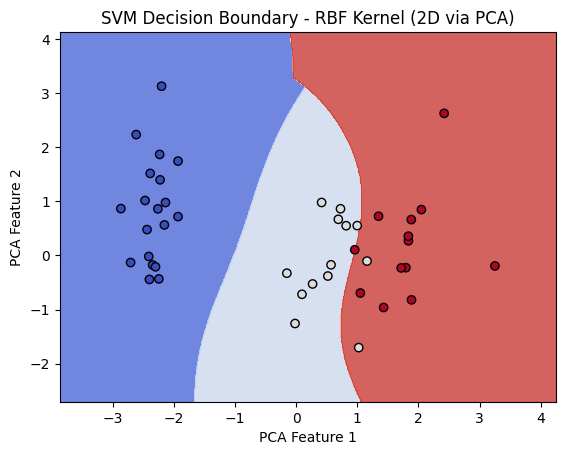

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import precision_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset (from uploaded file)
file_path = 'Iris.csv'  # Path to the uploaded Iris dataset
df = pd.read_csv(file_path)

# Step 1: Understand and clean the dataset (no cleanup required here)
print("Dataset Overview:")
print(df.head())  # Display first few rows

# Step 2: Convert the categorical 'Species' column to numerical labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Encode species

# Step 3: Split data into features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and target (Species)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Precision
    precision = precision_score(y_true, y_pred, average='macro')  # Use macro for multi-class precision

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Precision: {precision:.2f}")
    print("\nClassification Report:\n", class_report)

    return precision

# Step 7: Evaluate the SVM using Precision
precision_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")

# Step 8: Output predictions for each test instance
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'SepalLengthCm': X_test[:, 0],  # Standardized SepalLengthCm
    'SepalWidthCm': X_test[:, 1],  # Standardized SepalWidthCm
    'PetalLengthCm': X_test[:, 2],  # Standardized PetalLengthCm
    'PetalWidthCm': X_test[:, 3],  # Standardized PetalWidthCm
    'Actual Species': le.inverse_transform(y_test),  # Inverse transform to original species name
    'Predicted Species': le.inverse_transform(y_pred_rbf)  # Predicted species name
})

print(test_results.head())  # Display first few rows of the prediction results

# Step 9: Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)
plot_confusion_matrix(cm, le.classes_)  # Use species names as labels

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test, "RBF Kernel (2D via PCA)")

32.	The Iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to predict the iris plant category? (Use RBF Kernel)

iii.	Create a confusion matrix and evaluate the model using Recall.


Dataset Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--- SVM with RBF Kernel ---
Recall: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Predictions on Test Set:
   SepalLengthCm  SepalWidthCm  PetalLengthCm 

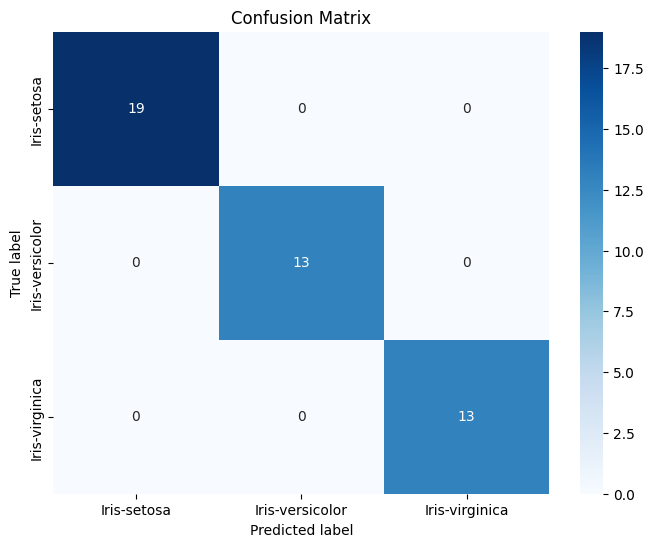

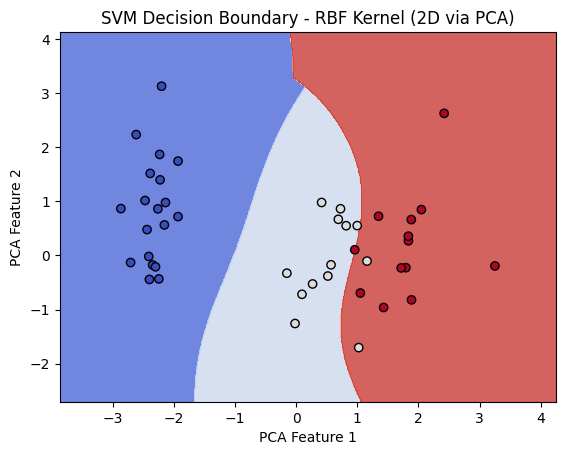

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset (from uploaded file)
file_path = 'Iris.csv'  # Path to the uploaded Iris dataset
df = pd.read_csv(file_path)

# Step 1: Understand and clean the dataset (no cleanup required here)
print("Dataset Overview:")
print(df.head())  # Display first few rows

# Step 2: Convert the categorical 'Species' column to numerical labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Encode species

# Step 3: Split data into features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and target (Species)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Recall
    recall = recall_score(y_true, y_pred, average='macro')  # Use macro for multi-class recall

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Recall: {recall:.2f}")
    print("\nClassification Report:\n", class_report)

    return recall

# Step 7: Evaluate the SVM using Recall
recall_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")

# Step 8: Output predictions for each test instance
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'SepalLengthCm': X_test[:, 0],  # Standardized SepalLengthCm
    'SepalWidthCm': X_test[:, 1],  # Standardized SepalWidthCm
    'PetalLengthCm': X_test[:, 2],  # Standardized PetalLengthCm
    'PetalWidthCm': X_test[:, 3],  # Standardized PetalWidthCm
    'Actual Species': le.inverse_transform(y_test),  # Inverse transform to original species name
    'Predicted Species': le.inverse_transform(y_pred_rbf)  # Predicted species name
})

print(test_results.head())  # Display first few rows of the prediction results

# Step 9: Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)
plot_confusion_matrix(cm, le.classes_)  # Use species names as labels

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test, "RBF Kernel (2D via PCA)")

33.	The Iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to predict the iris plant category? (Use RBF Kernel)

iii.	Create a confusion matrix and evaluate the model using Accuracy.


Dataset Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--- SVM with RBF Kernel ---
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Predictions on Test Set:
   SepalLengthCm  SepalWidthCm  PetalLengthC

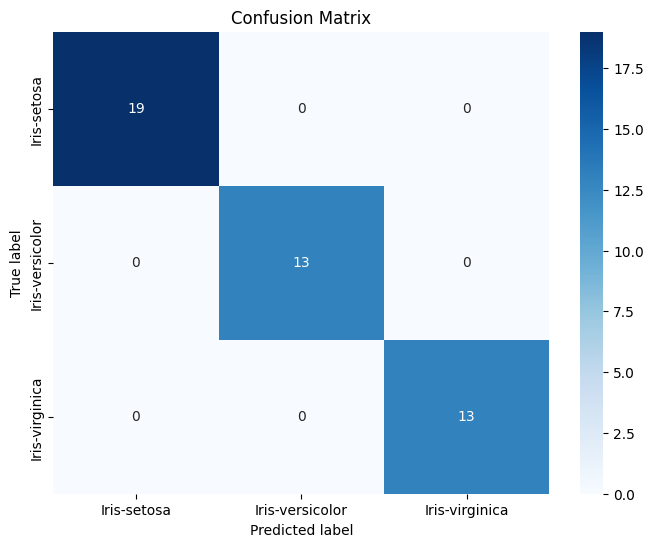

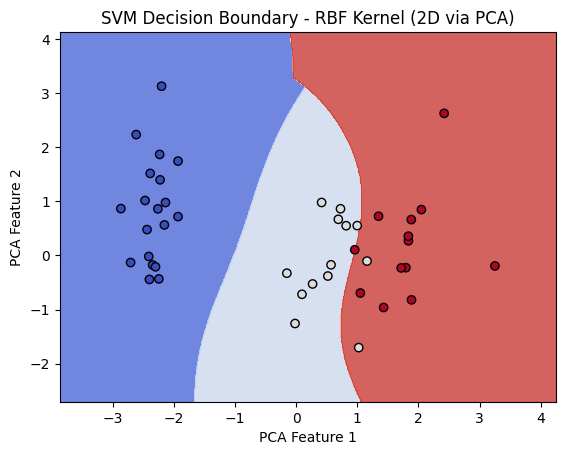

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset (from uploaded file)
file_path = 'Iris.csv'  # Path to the uploaded Iris dataset
df = pd.read_csv(file_path)

# Step 1: Understand and clean the dataset (no cleanup required here)
print("Dataset Overview:")
print(df.head())  # Display first few rows

# Step 2: Convert the categorical 'Species' column to numerical labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Encode species

# Step 3: Split data into features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and target (Species)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", class_report)

    return accuracy

# Step 7: Evaluate the SVM using Accuracy
accuracy_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")

# Step 8: Output predictions for each test instance
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'SepalLengthCm': X_test[:, 0],  # Standardized SepalLengthCm
    'SepalWidthCm': X_test[:, 1],  # Standardized SepalWidthCm
    'PetalLengthCm': X_test[:, 2],  # Standardized PetalLengthCm
    'PetalWidthCm': X_test[:, 3],  # Standardized PetalWidthCm
    'Actual Species': le.inverse_transform(y_test),  # Inverse transform to original species name
    'Predicted Species': le.inverse_transform(y_pred_rbf)  # Predicted species name
})

print(test_results.head())  # Display first few rows of the prediction results

# Step 9: Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)
plot_confusion_matrix(cm, le.classes_)  # Use species names as labels

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test, "RBF Kernel (2D via PCA)")

34.	The Iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to predict the iris plant category? (Use RBF Kernel)

iii.	Create a confusion matrix and evaluate the model using F1-Measure.



Dataset Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--- SVM with RBF Kernel ---
F1-Measure: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Predictions on Test Set:
   SepalLengthCm  SepalWidthCm  PetalLengt

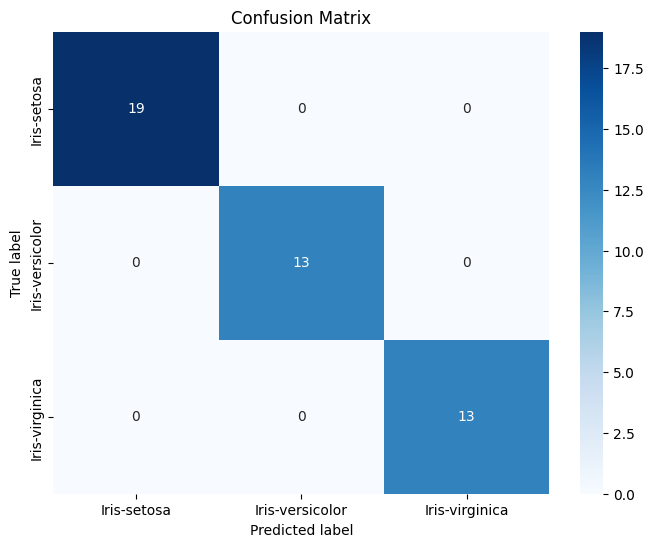

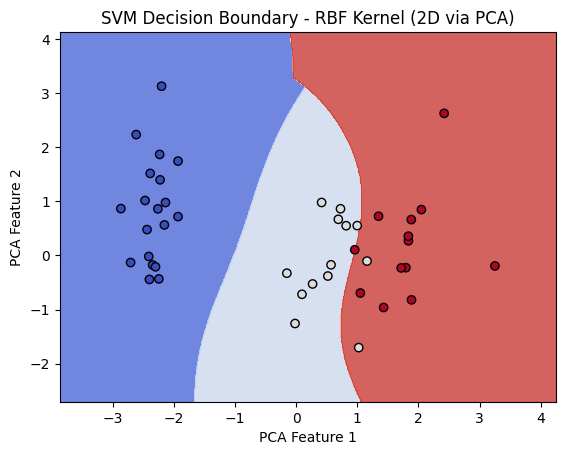

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset (from uploaded file)
file_path = 'Iris.csv'  # Path to the uploaded Iris dataset
df = pd.read_csv(file_path)

# Step 1: Understand and clean the dataset (no cleanup required here)
print("Dataset Overview:")
print(df.head())  # Display first few rows

# Step 2: Convert the categorical 'Species' column to numerical labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Encode species

# Step 3: Split data into features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and target (Species)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # F1-Measure
    f1 = f1_score(y_true, y_pred, average='macro')  # Use macro for multi-class F1-measure

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"F1-Measure: {f1:.2f}")
    print("\nClassification Report:\n", class_report)

    return f1

# Step 7: Evaluate the SVM using F1-Measure
f1_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")

# Step 8: Output predictions for each test instance
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'SepalLengthCm': X_test[:, 0],  # Standardized SepalLengthCm
    'SepalWidthCm': X_test[:, 1],  # Standardized SepalWidthCm
    'PetalLengthCm': X_test[:, 2],  # Standardized PetalLengthCm
    'PetalWidthCm': X_test[:, 3],  # Standardized PetalWidthCm
    'Actual Species': le.inverse_transform(y_test),  # Inverse transform to original species name
    'Predicted Species': le.inverse_transform(y_pred_rbf)  # Predicted species name
})

print(test_results.head())  # Display first few rows of the prediction results

# Step 9: Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)
plot_confusion_matrix(cm, le.classes_)  # Use species names as labels

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test, "RBF Kernel (2D via PCA)")